# ANOVA TEST
- 등급 vs 매출액:
    - anova p < 0.05: 등급 간 통계적인 차이가 있음
    - post-hoc: 12세이상 관람, 전체 관람 두 등급의 성질이 달라서 매출액이 차이가 있다.
- 장르 vs 매출액:
    anova p > 0.05: 장르별 매출액 통계적인 유의미 x
   
- 계절 vs 매출액:
    anova p < 0.06
    post-hoc: 여름, 겨울 true


In [1]:
# 분산분석을 사용하기 위한 라이브러리를 불러오는 코드
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [52]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:/Python/movie-data-analysis/data/movie.csv', encoding='ms949', index_col=[0,1])
#df.head()

In [29]:
# # 최근 3년간 데이터
# df = df.query('year>=2016')

# <font color=blue> 전처리 </font>

### <font color=blue> 등급 컬럼 정리 </font>

In [53]:
df['등급'].unique()

array(['12세이상관람가', '청소년관람불가', '15세이상관람가', '전체관람가',
       '15세 미만인 자는 관람할 수 없는 등급 ,15세이상관람가', '청소년관람불가,15세이상관람가', '15세관람가'],
      dtype=object)

In [54]:
df['등급'] = df['등급'].apply(lambda x: x.replace(' ', ''))
df['등급'].unique()

array(['12세이상관람가', '청소년관람불가', '15세이상관람가', '전체관람가',
       '15세미만인자는관람할수없는등급,15세이상관람가', '청소년관람불가,15세이상관람가', '15세관람가'],
      dtype=object)

In [55]:
df.loc[df['등급'] == '15세미만인자는관람할수없는등급,15세이상관람가', '등급'] = '15세이상관람가'
df.loc[df['등급'] == '청소년관람불가,15세이상관람가', '등급'] = '청소년관람불가'
df.loc[df['등급'] == '15세관람가', '등급'] = '15세이상관람가'

df['등급'].unique()

array(['12세이상관람가', '청소년관람불가', '15세이상관람가', '전체관람가'], dtype=object)

In [56]:
df.columns

Index(['index', '영화명', '개봉일', '매출액', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수',
       '대표국적', '제작사', '배급사', '등급', '장르', '감독', '배우'],
      dtype='object')

In [57]:
genre = df['장르'].unique()

In [58]:
genre_unique = []
for i in range(len(genre)):
    for j in range(len(genre[i].split(','))):
        if genre[i].split(',')[j] not in genre_unique:
            genre_unique.append(genre[i].split(',')[j])
genre_unique

['SF',
 '액션',
 '어드벤처',
 '드라마',
 '미스터리',
 '코미디',
 '판타지',
 '스릴러',
 '전쟁',
 '사극',
 '멜로/로맨스',
 '범죄',
 '애니메이션',
 '가족',
 '공포(호러)',
 '다큐멘터리',
 '뮤지컬',
 '기타',
 '서부극(웨스턴)']

In [59]:
#df[df['장르']=='서부극(웨스턴)']

### 등급별 매출차이 box-plot

In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() #컴퓨터내에 설치되 있는 맑은고딕 폰트를 가져오겠다.
rc('font',family=font_name)

Text(0, 0.5, '매출액')

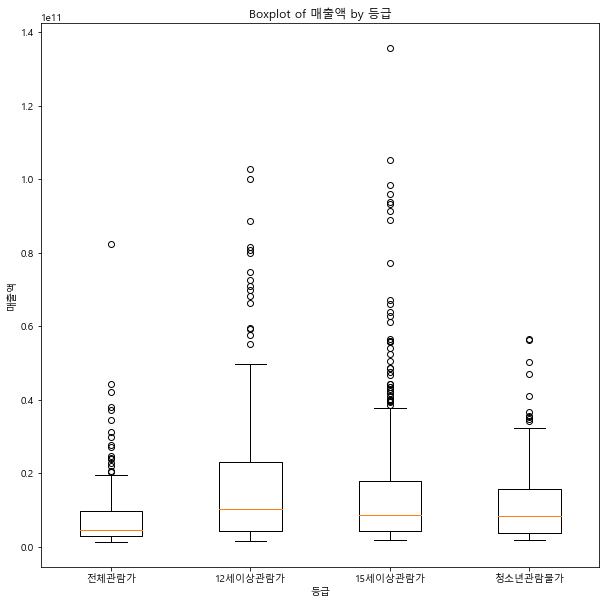

In [61]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.boxplot([df[df["등급"]=="전체관람가"]["매출액"],
            df[df["등급"]=="12세이상관람가"]["매출액"],
           df[df["등급"]=="15세이상관람가"]["매출액"],
           df[df["등급"]=="청소년관람불가"]["매출액"]],labels=["전체관람가","12세이상관람가","15세이상관람가","청소년관람불가"])

ax.set_title("Boxplot of 매출액 by 등급")
ax.set_xlabel("등급")
ax.set_ylabel("매출액")

###  등급별 anova

In [63]:
# Statsmodel을 사용한 일원분산분석

df_anova = pd.DataFrame(df, columns=['매출액','등급'])
model = ols('매출액~C(등급)',df_anova).fit()
print(anova_lm(model))

             df        sum_sq       mean_sq          F        PR(>F)
C(등급)       3.0  9.226278e+21  3.075426e+21  10.666156  6.808074e-07
Residual  896.0  2.583481e+23  2.883350e+20        NaN           NaN


### 등급별 post-hoc

In [64]:
# p-value가 0.05보다 작으면 그룹의 평균값이 통계적으로 유의미하게 차이가 남.

df_post = df_anova.reset_index()
df_post

,year,rank,매출액,등급
0,2010,1,81455728000,12세이상관람가
1,2010,2,47101332000,청소년관람불가
2,2010,3,43394990000,12세이상관람가
3,2010,4,40153729000,15세이상관람가
4,2010,5,32635195500,12세이상관람가
5,2010,6,26345113000,12세이상관람가
6,2010,7,25437300500,청소년관람불가
7,2010,8,23831958600,12세이상관람가
8,2010,9,21641750000,12세이상관람가
9,2010,10,22490024000,청소년관람불가


             Multiple Comparison of Means - Tukey HSD,FWER=0.05             
 group1   group2      meandiff           lower            upper       reject
----------------------------------------------------------------------------
12세이상관람가 15세이상관람가 -1879087548.1786  -5392560896.6713 1634385800.3141  False 
12세이상관람가  전체관람가   -8962869914.941  -13335051313.2423 -4590688516.6397  True 
12세이상관람가 청소년관람불가  -5513334994.5692  -10329720309.213 -696949679.9253   True 
15세이상관람가  전체관람가   -7083782366.7624  -11293070751.716 -2874493981.8087  True 
15세이상관람가 청소년관람불가  -3634247446.3906  -8303262977.2247 1034768084.4436  False 
 전체관람가   청소년관람불가  3449534920.3718   -1895666781.7396 8794736622.4832  False 
----------------------------------------------------------------------------


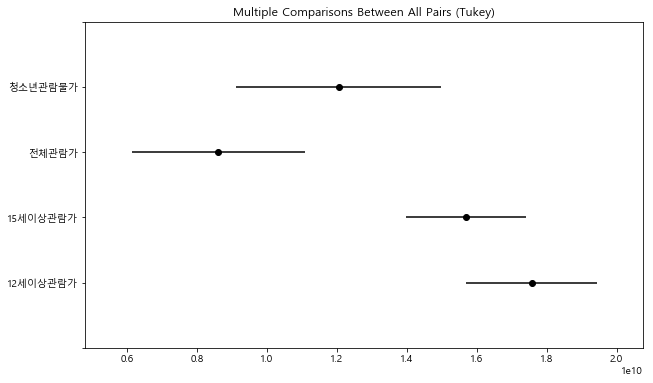

In [65]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df_post['매출액'], df_post['등급'], alpha=0.05)
print(posthoc)

fig = posthoc.plot_simultaneous()

# 분산분석(ANOVA)를 통해 3가지 그룹간에 통계적인 차이가 있다는 것을 증명했고,
# 사후검정을 통해 그룹 1.0과 2.0의 평균이 유의미한 차이가 있다는 것을 보았습니다.

# h0: 차이가 없다
# h1: 차이가 있다
# p < 0.05 reject true. 두 그룹의 차이가 잇다
# 두 그룹간의 성질이 진짜 달라서 그게 매출액에 영향을 미치는지..틀린말
# 두 그룹 성질이 달라서 매출액이 차이가 있다.

In [69]:
# from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

# MultiComp = MultiComparison(df_post['매출액'], df_post['등급'])
# print(MultiComp.tukeyhsd().summary())

In [68]:
# comp = MultiComp.allpairtest(stats.ttest_rel, method='Holm')
# comp[0]

# <font color=red> 장르 </font>

In [83]:
df['장르'].sum()

'SF,액션,어드벤처액션,드라마드라마,미스터리드라마,액션SF,액션,어드벤처액션,코미디,판타지드라마,스릴러드라마,전쟁드라마사극,코미디,멜로/로맨스스릴러,액션범죄,드라마멜로/로맨스,코미디액션,어드벤처,판타지애니메이션,코미디,어드벤처,가족미스터리,판타지스릴러,멜로/로맨스액션,코미디애니메이션,코미디,가족판타지,어드벤처,가족SF,드라마판타지,멜로/로맨스,스릴러코미디,멜로/로맨스액션,어드벤처,판타지판타지,어드벤처액션,스릴러스릴러액션,드라마,사극드라마,액션스릴러,액션,범죄가족,코미디,판타지사극,액션액션,가족,판타지,어드벤처코미디,드라마코미디,드라마,액션스릴러,범죄공포(호러),스릴러,액션판타지,가족,어드벤처범죄,스릴러미스터리,스릴러,드라마멜로/로맨스,드라마애니메이션미스터리,범죄,어드벤처애니메이션,가족드라마,스릴러드라마,미스터리,스릴러코미디,드라마스릴러,액션,드라마,미스터리드라마,스릴러액션,스릴러,SF공포(호러),스릴러액션액션,코미디드라마드라마,코미디,멜로/로맨스드라마,멜로/로맨스애니메이션,가족애니메이션,어드벤처다큐멘터리,드라마애니메이션,가족코미디,미스터리드라마,전쟁,액션코미디,스릴러멜로/로맨스,코미디코미디드라마,액션,판타지,어드벤처코미디가족,코미디,드라마드라마액션,공포(호러),스릴러드라마,멜로/로맨스코미디액션드라마,가족드라마액션,범죄,미스터리,스릴러액션,스릴러,드라마드라마,액션공포(호러),미스터리,스릴러액션,판타지드라마,멜로/로맨스,코미디멜로/로맨스,뮤지컬애니메이션,액션,SF스릴러,액션드라마,액션,사극액션,스릴러,범죄공포(호러)드라마드라마액션,코미디,멜로/로맨스액션애니메이션,어드벤처,판타지가족,드라마,액션액션,스릴러,SF,어드벤처공포(호러),스릴러다큐멘터리애니메이션,가족,판타지드라마,범죄,스릴러애니메이션멜로/로맨스,코미디액션,어드벤처사극,액션드라마,코미디드라마애니메이션,액션,어드벤처,코미디,가족액션코미디,액션드라마판타지,미스터리액션,드라마,SF액션,판타지코미디,액션드라마,전쟁공포(호러),멜로/로맨스,코미디액션,SF,드라마코미디,멜로/로맨스액션스릴러코미디스릴러SF,액션,스릴러

In [11]:
['판타지',
 '드라마',
 '액션',
 '어드벤처',
 'SF',
 '스릴러',
 '사극',
 '코미디',
 '범죄',
 '애니메이션',
 '미스터리',
 '가족',
 '멜로/로맨스',
 '공포(호러)',
 '뮤지컬',
 '다큐멘터리',
 '기타',
 '전쟁']

In [18]:
df[df['장르'].str.contains('판타지')]['매출액'],
df[df['장르'].str.contains('드라마')]['매출액'],
df[df['장르'].str.contains('액션')]['매출액'],
df[df['장르'].str.contains('어드벤처')]['매출액'],
df[df['장르'].str.contains('SF')]['매출액'],
df[df['장르'].str.contains('스릴러')]['매출액'],
df[df['장르'].str.contains('사극')]['매출액'],
df[df['장르'].str.contains('코미디')]['매출액'],
df[df['장르'].str.contains('범죄')]['매출액'],
df[df['장르'].str.contains('애니메이션')]['매출액'],
df[df['장르'].str.contains('미스터리')]['매출액'],
df[df['장르'].str.contains('가족')]['매출액'],
df[df['장르'].str.contains('멜로/로맨스')]['매출액'],
df[df['장르'].str.contains('공포(호러)')]['매출액'],
df[df['장르'].str.contains('뮤지컬')]['매출액'],
df[df['장르'].str.contains('다큐멘터리')]['매출액'],
df[df['장르'].str.contains('기타')]['매출액'],
df[df['장르'].str.contains('전쟁')]['매출액']

year  rank
2016  10       47481830396
      13       39300515858
      21       24467887950
      22       21841214586
      30       18906246428
      45       10142271205
      48        8999085248
      57        7621291624
      71        5127537094
      77        4145733267
      78        3946462400
      83        4204317791
2017  2        68350496432
      9        42133751579
      11       39227691395
      15       30504689978
      20       24975495122
      34       17468588886
      40       14629677795
      42       13990563383
      57        8535886061
      76        4355441358
      89        3920458500
      90        3373678655
      97        2694247700
      98        2899784921
2018  1       102666146909
      2        99926399769
      5        47355583705
      30       20816583118
      53        7934082800
      64        5001247250
      76        4120048900
      77        4218077050
      98        2349913000
Name: 매출액, dtype: int64

C:\Users\njikim\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  app.launch_new_instance()


Text(0, 0.5, '매출액')

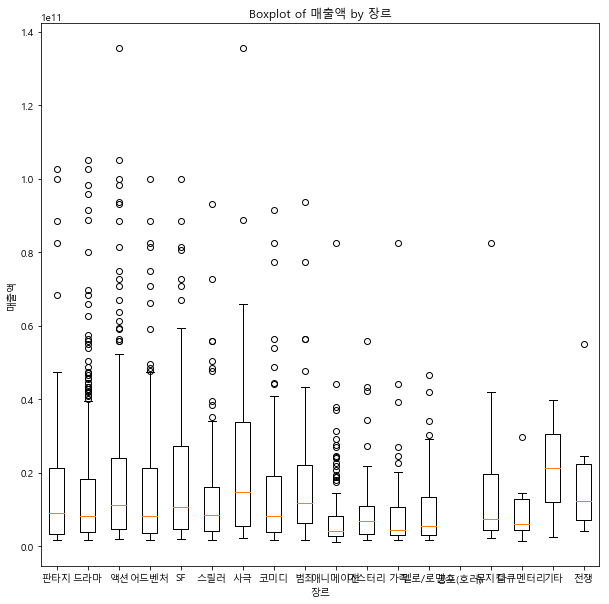

In [70]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.boxplot([df[df['장르'].str.contains('판타지')]['매출액'],
            df[df['장르'].str.contains('드라마')]['매출액'],
            df[df['장르'].str.contains('액션')]['매출액'],
            df[df['장르'].str.contains('어드벤처')]['매출액'],
            df[df['장르'].str.contains('SF')]['매출액'],
            df[df['장르'].str.contains('스릴러')]['매출액'],
            df[df['장르'].str.contains('사극')]['매출액'],
            df[df['장르'].str.contains('코미디')]['매출액'],
            df[df['장르'].str.contains('범죄')]['매출액'],
            df[df['장르'].str.contains('애니메이션')]['매출액'],
            df[df['장르'].str.contains('미스터리')]['매출액'],
            df[df['장르'].str.contains('가족')]['매출액'],
            df[df['장르'].str.contains('멜로/로맨스')]['매출액'],
            df[df['장르'].str.contains('공포(호러)')]['매출액'],
            df[df['장르'].str.contains('뮤지컬')]['매출액'],
            df[df['장르'].str.contains('다큐멘터리')]['매출액'],
            df[df['장르'].str.contains('기타')]['매출액'],
            df[df['장르'].str.contains('전쟁')]['매출액']],labels=['판타지','드라마', '액션', '어드벤처', 'SF', '스릴러', '사극', '코미디', '범죄', '애니메이션', '미스터리', '가족', '멜로/로맨스', '공포(호러)', '뮤지컬', '다큐멘터리', '기타', '전쟁'])

ax.set_title("Boxplot of 매출액 by 장르")
ax.set_xlabel("장르")
ax.set_ylabel("매출액")

###  장르별 anova

In [71]:
# Statsmodel을 사용한 일원분산분석

df_anova = pd.DataFrame(df, columns=['매출액','장르'])
model = ols('매출액~C(장르)',df_anova).fit()
print(anova_lm(model))

             df        sum_sq       mean_sq         F   PR(>F)
C(장르)     245.0  7.388808e+22  3.015840e+20  1.018326  0.42558
Residual  654.0  1.936863e+23  2.961565e+20       NaN      NaN


# <font color=red> 계절 </font>

In [72]:
df.head()

index     영화명         개봉일          매출액         누적매출액      관객수  \
year rank                                                                  
2010 1         0     아바타  2009-12-17  81455728000  124896892500  8151952   
     2         1     아저씨  2010-08-04  47101332000   47101332000  6178248   
     3         2     인셉션  2010-07-21  43394990000   43394990000  5827444   
     4         3     의형제  2010-02-04  40153729000   40153729000  5416812   
     5         4  아이언맨 2  2010-04-29  32635195500   32635195500  4425003   

              누적관객수  스크린수    상영횟수 대표국적                      제작사  \
year rank                                                         
2010 1     13302619   714  111860   미국            이십세기폭스필름코퍼레이션   
     2      6178248   501  109853   한국                오퍼스픽쳐스(유)   
     3      5827444   531   81891   미국     워너 브러더스 픽쳐스,레젼데리 픽쳐스   
     4      5416812   569  118243   한국  (주)쇼박스,(주)다세포클럽,루비콘픽쳐스㈜   
     5      4425003   921   87665   미국      파라마운트 픽쳐스,마블 엔터프라이즈   

                                 배급사        등급          장르        감독  \
year rank                                                              
2010 1     주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)  12세이상관람가  SF,액션,어드벤처   제임스 카메론   
     2                     씨제이엔터테인먼트   청소년관람불가      액션,드라마       이정범   
     3                 워너브러더스 코리아(주)  12세이상관람가    드라마,미스터리  크리스토퍼 놀란   
     4                        (주)쇼박스  15세이상관람가      드라마,액션        장훈   
     5                     씨제이엔터테인먼트  12세이상관람가  SF,액션,어드벤처     존 파브로   

                                                          배우  
year rank                                                     
2010 1                                    샘 워싱턴,조 샐다나,시고니 위버  
     2     원빈,김새론,김희원,김성오,김태훈,김호연,김성훈,김효민,김효서,신동민,홍석준,조영아...  
     3                           레오나르도 디카프리오,엘렌 페이지,마리온 꼬띨라르  
     4     송강호,강동원,전국환,박혁권,윤희석,최정우,정인기,설진욱,강명희,홍서백,박용진,김의...  
     5               로버트 다우니 주니어,기네스 팰트로우,돈 치들,스칼렛 요한슨,미키 루크

In [73]:
df_season = df[['영화명', '개봉일', '매출액']].reset_index(drop=True)
df_season.head()

,영화명,개봉일,매출액
0,아바타,2009-12-17,81455728000
1,아저씨,2010-08-04,47101332000
2,인셉션,2010-07-21,43394990000
3,의형제,2010-02-04,40153729000
4,아이언맨 2,2010-04-29,32635195500


In [74]:
def season(row):
    if (row['개봉일'].split('-')[1] == '03') or (row['개봉일'].split('-')[1] == '04') or (row['개봉일'].split('-')[1] == '05'):
        return '봄'
    elif (row['개봉일'].split('-')[1] == '06') or (row['개봉일'].split('-')[1] == '07') or (row['개봉일'].split('-')[1] == '08'):
        return '여름'
    elif (row['개봉일'].split('-')[1] == '09') or (row['개봉일'].split('-')[1] == '10') or (row['개봉일'].split('-')[1] == '11'):
        return '가을'
    else:
        return '겨울'

In [75]:
new_column = df.apply(lambda row: season(row), axis=1)

In [76]:
df_season['계절'] = new_column.reset_index(drop=True)

In [77]:
df_season

,영화명,개봉일,매출액,계절
0,아바타,2009-12-17,81455728000,겨울
1,아저씨,2010-08-04,47101332000,여름
2,인셉션,2010-07-21,43394990000,여름
3,의형제,2010-02-04,40153729000,겨울
4,아이언맨 2,2010-04-29,32635195500,봄
5,전우치,2009-12-23,26345113000,겨울
6,이끼,2010-07-14,25437300500,여름
7,포화속으로,2010-06-16,23831958600,여름
8,하모니,2010-01-28,21641750000,겨울
9,방자전,2010-06-02,22490024000,여름


###  boxplot

Text(0, 0.5, '매출액')

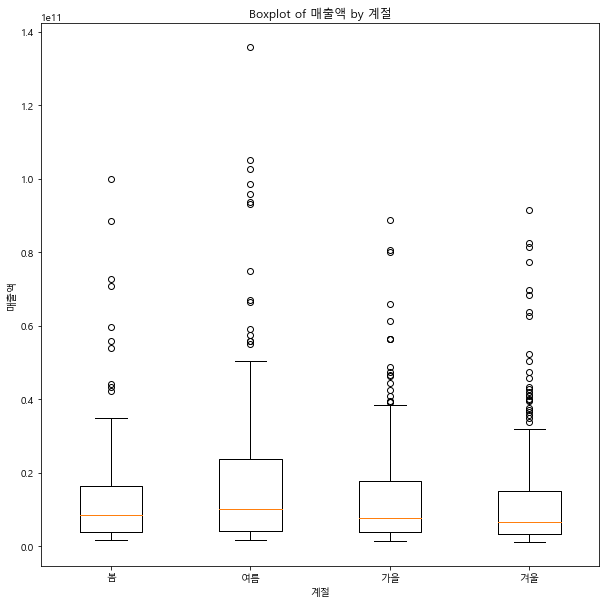

In [79]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.boxplot([df_season[df_season['계절']=='봄']['매출액'],
            df_season[df_season['계절']=='여름']['매출액'],
            df_season[df_season['계절']=='가을']['매출액'],
            df_season[df_season['계절']=='겨울']['매출액']],labels=['봄','여름','가을','겨울'])

ax.set_title("Boxplot of 매출액 by 계절")
ax.set_xlabel("계절")
ax.set_ylabel("매출액")

### 계절별 anova

In [80]:
# Statsmodel을 사용한 일원분산분석

df_season_anova = pd.DataFrame(df_season, columns=['매출액','계절'])
model = ols('매출액~C(계절)',df_season_anova).fit()
print(anova_lm(model))

             df        sum_sq       mean_sq         F    PR(>F)
C(계절)       3.0  5.650968e+21  1.883656e+21  6.443699  0.000256
Residual  896.0  2.619235e+23  2.923253e+20       NaN       NaN


### 계절별 post-hoc

In [81]:
# p-value가 0.05보다 작으면 그룹의 평균값이 통계적으로 유의미하게 차이가 남.

df_season_post = df_season_anova.reset_index()
df_season_post

,index,매출액,계절
0,0,81455728000,겨울
1,1,47101332000,여름
2,2,43394990000,여름
3,3,40153729000,겨울
4,4,32635195500,봄
5,5,26345113000,겨울
6,6,25437300500,여름
7,7,23831958600,여름
8,8,21641750000,겨울
9,9,22490024000,여름


           Multiple Comparison of Means - Tukey HSD,FWER=0.06          
group1 group2     meandiff          lower            upper       reject
-----------------------------------------------------------------------
  가을     겨울   -1251396716.0025 -5177872538.0934 2675079106.0885  False 
  가을     봄    -713951258.4884  -5030555552.7009  3602653035.724  False 
  가을     여름   4999961199.8793   843064271.3336  9156858128.4251   True 
  겨울     봄     537445457.514   -3472454947.3267 4547345862.3548  False 
  겨울     여름   6251357915.8818   2413908150.936  10088807680.8276  True 
  봄      여름   5713912458.3678   1478126704.835  9949698211.9005   True 
-----------------------------------------------------------------------


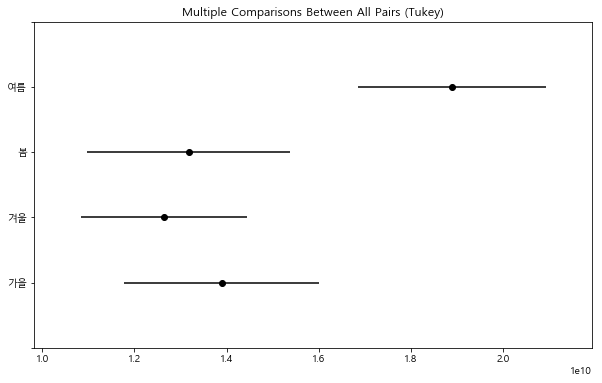

In [82]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df_season_post['매출액'], df_season_post['계절'], alpha=0.06)
print(posthoc)

fig = posthoc.plot_simultaneous()

# 분산분석(ANOVA)를 통해 3가지 그룹간에 통계적인 차이가 있다는 것을 증명했고,
# 사후검정을 통해 그룹 1.0과 2.0의 평균이 유의미한 차이가 있다는 것을 보았습니다.

# h0: 차이가 없다
# h1: 차이가 있다
# p < 0.05 reject true. 두 그룹의 차이가 잇다
# 두 그룹간의 성질이 진짜 달라서 그게 매출액에 영향을 미치는지..틀린말
# 두 그룹 성질이 달라서 매출액이 차이가 있다.